In [6]:
!pip3 install mlgrad-0.7.1-cp311-cp311-linux_x86_64.whl

Processing ./mlgrad-0.7.1-cp311-cp311-linux_x86_64.whl


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
data = pd.read_csv("/content/animals.csv")
data = data[['body', 'brain']]

X = np.log(data.body.values)
Y = np.log(data.brain.values)

Xs = X.reshape(-1, 1)

# Расчет z-оценки для выявления выбросов
mean = np.mean(data, axis=0)
std = np.std(data, axis=0)

z_scores = (data - mean) / std
z_scores.head()

,body,brain
0,-0.264287,-0.432094
1,-0.235637,-0.115588
2,-0.262125,-0.347113
3,-0.262661,-0.350546
4,-0.264306,-0.434078


In [81]:
threshold = 3 # Порог для выявления выбросов

outliers_mask = np.any(np.abs(z_scores) > threshold, axis=1)
outliers = np.where(outliers_mask)[0]
outliers = [int(x) for x in list(outliers)]

print("Индексы выбросов: ", outliers)

Индексы выбросов:  [6, 14, 25]


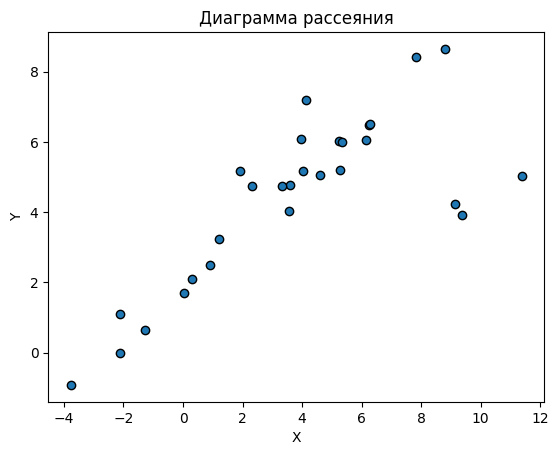

In [89]:
plt.scatter(X, Y, edgecolors="k")
plt.title('Диаграмма рассеяния')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Уравнение регрессии, с учетом выбросов: y = 2.5548981349401254 + 0.4959946916258483x


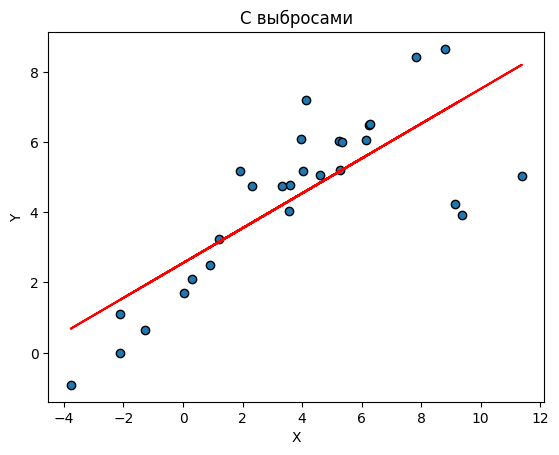

In [90]:
def linear_regression(x, y):
    """ Расчет коэфициентов методом наименьших квадратов """
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Расчет коэффициентов b1 и b0
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    b1 = numerator / denominator
    b0 = y_mean - b1 * x_mean

    return b0, b1

b0, b1 = linear_regression(X, Y)
print(f"Уравнение регрессии, с учетом выбросов: y = {b0} + {b1}x")

# Прогнозирование
def predict(x):
    return b0 + b1 * x

Y_pred = predict(X)
plt.scatter(X, Y, edgecolors="k")
plt.plot(X, Y_pred, color="Red")
plt.title('С выбросами')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

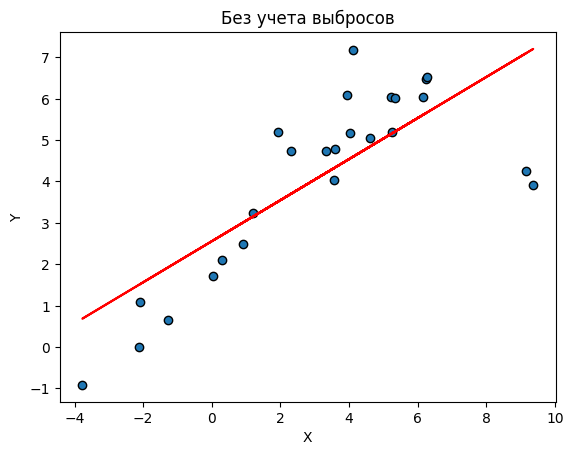

In [91]:
data_f = data[~data.index.isin(outliers)]
X_f = np.log(data_f.body.values)
Y_f = np.log(data_f.brain.values)

Y_pred = predict(X_f)

plt.scatter(X_f, Y_f, edgecolors="k")
plt.plot(X_f, Y_pred, color="Red")
plt.title('Без учета выбросов')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [74]:
b0, b1 = linear_regression(X, Y)
print(f"Уравнение регрессии, без учета выбросов: y = {b0} + {b1}x")

Уравнение регрессии, без учета выбросов: y = 2.5548981349401254 + 0.4959946916258483x


Можно попробовать другие подходы к построение линейной регрессии, удалив полные выбросы. Например, построить робастую регрессию  

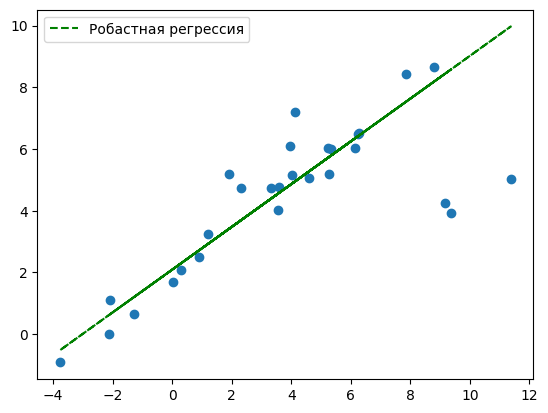

In [111]:
from sklearn.linear_model import HuberRegressor

model_huber = HuberRegressor().fit(Xs, Y)
Y_pred_huber = model_huber.predict(Xs)

plt.scatter(X, Y)
plt.plot(X, Y_pred_huber, 'g--', label='Робастная регрессия')
plt.legend()